# Step-by-step Code for Chapter Four Implementation 
## on
### MOBILE TELEPHONE NETWORK, 4TH GENERATION  OPTIMIZATION USING MACHINE LEARNING MODELS
by
#### ADENIYI AYOMIDE OLUWATIMILEHIN
#### MATRIC NUMBER: CSC/DE/22/003


#### STEP 1: Import Required Libraries

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# For consistent results
np.random.seed(42)


#### STEP 2: Simulate LTE Dataset (RSRP, SINR, etc.)



In [4]:
n_samples = 5000
data = pd.DataFrame({
    'RSRP': np.random.normal(-90, 5, n_samples),
    'SINR': np.random.normal(10, 3, n_samples),
    'Cell_Load': np.random.uniform(0, 1, n_samples),
    'Bandwidth_Utilization': np.random.uniform(0, 100, n_samples),
    'User_Speed': np.random.normal(30, 10, n_samples),
    'Latency': np.random.normal(50, 10, n_samples),
    'Throughput': np.random.normal(25, 5, n_samples)  # Target
})

data.head()

,RSRP,SINR,Cell_Load,Bandwidth_Utilization,User_Speed,Latency,Throughput
0,-87.516429,8.728721,0.321255,51.444643,25.205406,51.585667,26.694235
1,-90.691322,8.639758,0.103019,56.949184,19.719322,43.895417,23.015599
2,-86.761557,4.613070,0.071808,1.872471,35.020019,71.580190,30.204268
3,-82.384851,9.009729,0.094276,71.122728,12.931374,39.423711,21.312195
4,-91.170767,12.198487,0.582869,71.239430,27.321606,64.006467,18.509040


#### STEP 3: Feature Selection and Scaling

In [5]:

X = data.drop(columns=['Throughput'])
y = data['Throughput']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


#### STEP 4: Model Training and Evaluation



In [6]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.columns = ['Model', 'Mean Squared Error', 'R-Squared']
results_df.sort_values(by='R-Squared', ascending=False)

,Model,Mean Squared Error,R-Squared
0,Linear Regression,25.119574,-0.000511
2,Random Forest,26.454384,-0.053677
1,Decision Tree,52.753985,-1.101189


#### STEP 5: Visualization - Actual vs Predicted for Each Model

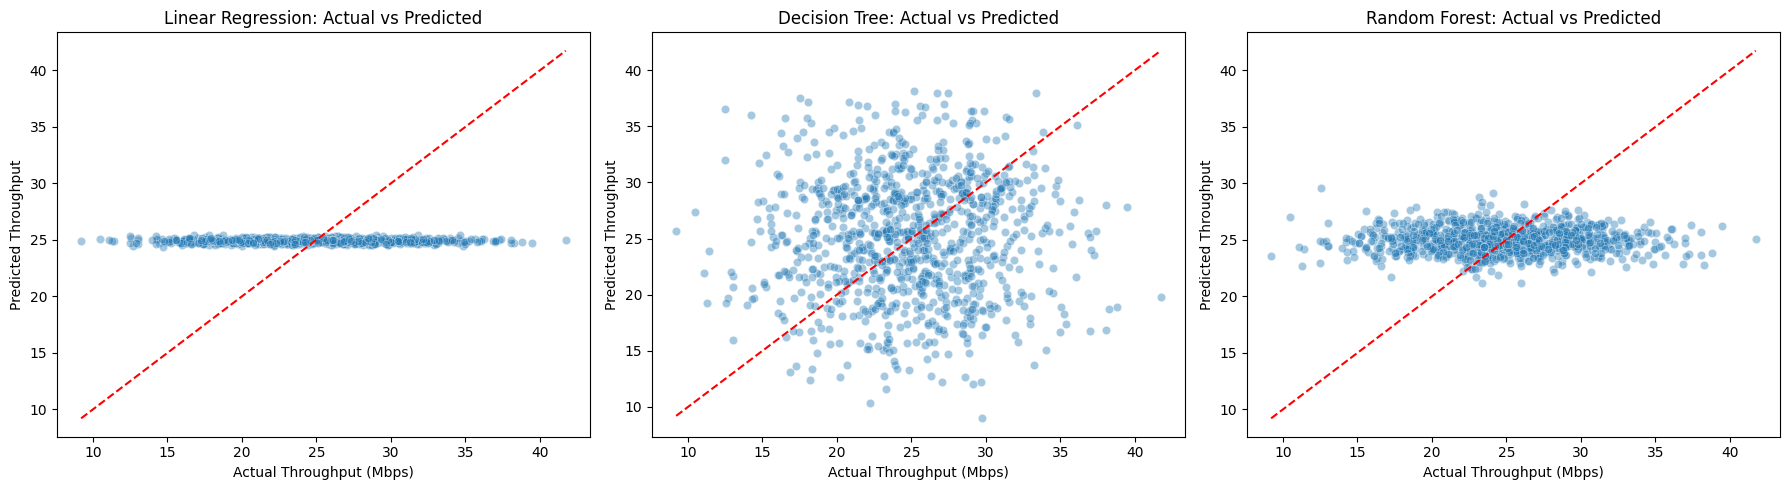

In [22]:

plt.figure(figsize=(18, 5))
for i, (name, pred) in enumerate(predictions.items()):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=y_test, y=pred, alpha=0.4)
    plt.title(f'{name}: Actual vs Predicted')
    plt.xlabel('Actual Throughput (Mbps)')
    plt.ylabel('Predicted Throughput')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.savefig("Actual vs Predicted for Each Models.png", dpi=300, bbox_inches='tight')  # high quality

plt.show()


#### STEP 6: Feature Importance for Random Forest

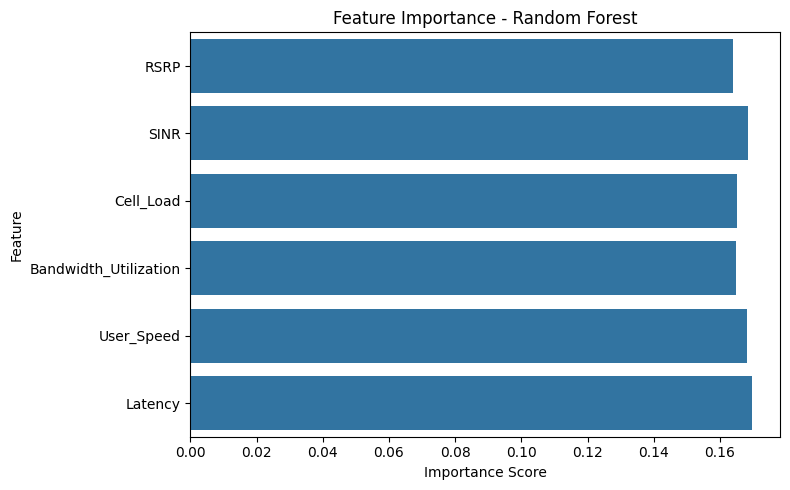

In [21]:

rf_model = models['Random Forest']
feature_names = X.columns
importances = rf_model.feature_importances_

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig("Feature Importance for Random Forest.png", dpi=300, bbox_inches='tight')  # high quality

plt.show()


# STEP 0.5: Exploratory Data Analysis (EDA)

# 🔥 Heatmap: Correlation Between Features

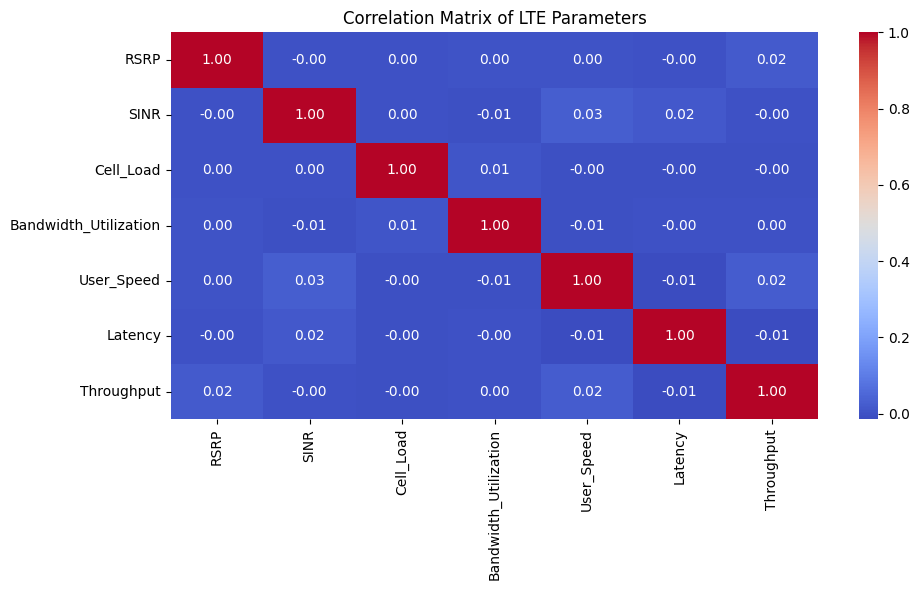

In [20]:

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of LTE Parameters")
plt.tight_layout()
plt.savefig("Correlation Between Featuress.png", dpi=300, bbox_inches='tight')  # high quality

plt.show()


# 📈 KDE Plot: Distribution of Throughput

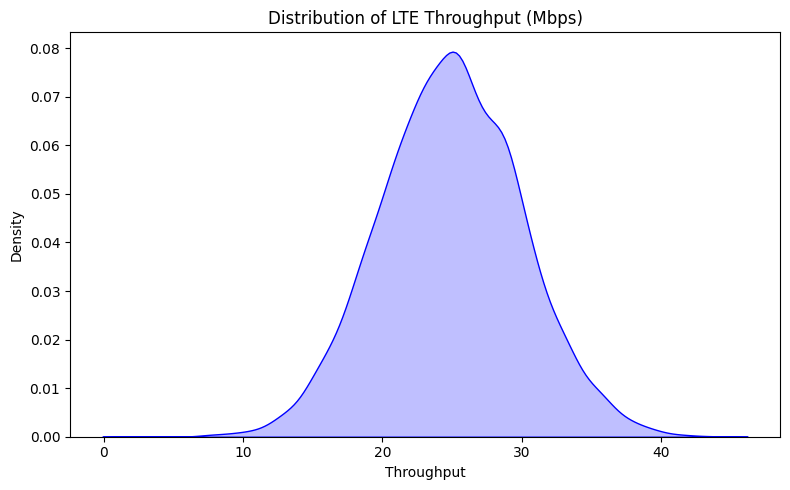

In [19]:

plt.figure(figsize=(8, 5))
sns.kdeplot(data['Throughput'], fill=True, color='blue')
plt.title('Distribution of LTE Throughput (Mbps)')
plt.xlabel('Throughput')
plt.tight_layout()
plt.savefig("Distribution of Throughputs.png", dpi=300, bbox_inches='tight')  # high quality
plt.show()


# 📉 Histograms for All Features

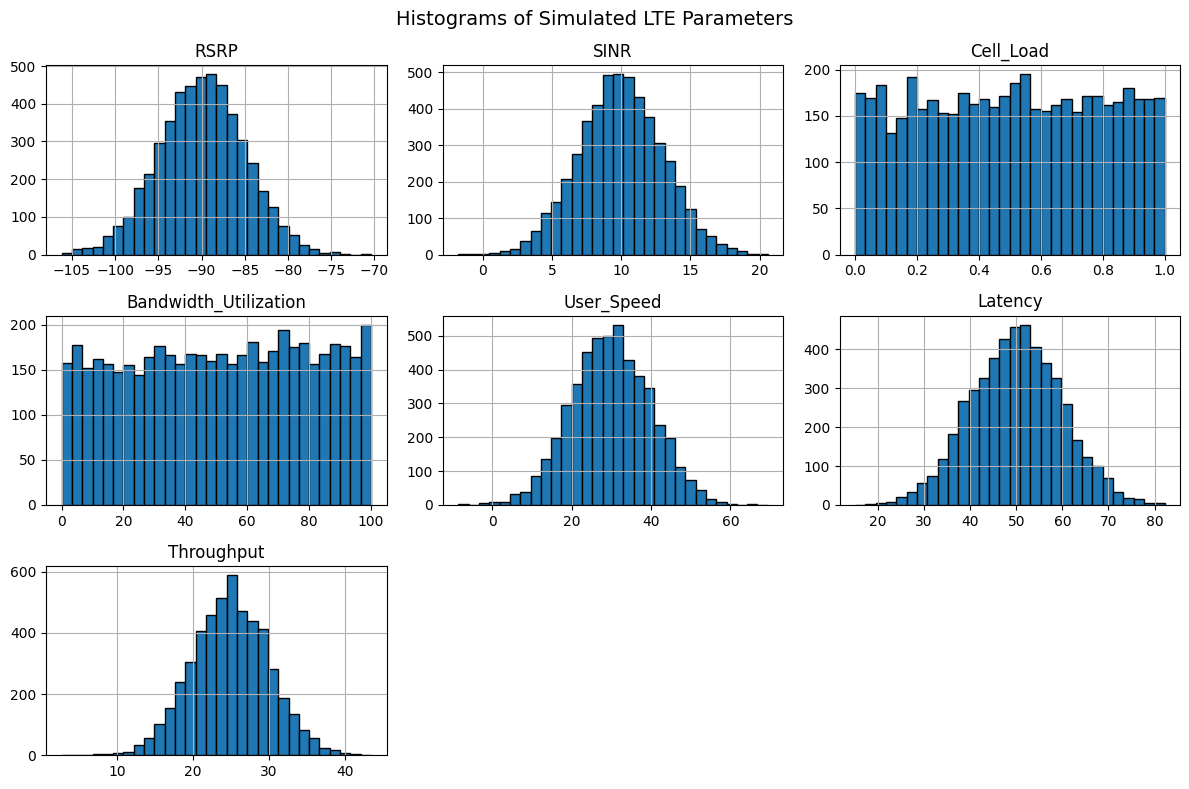

In [17]:

data.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Simulated LTE Parameters", fontsize=14)
plt.tight_layout()
plt.savefig("Histograms for All Features.png", dpi=300, bbox_inches='tight')  # high quality
plt.show()



 # Model Performance Bar Chart

#### MSE and R² Comparison Bar Charts

C:\Users\Jerrytopcywork\AppData\Local\Temp\ipykernel_6408\2313067389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Squared Error', data=results_df, ax=ax[0], palette='pastel')
C:\Users\Jerrytopcywork\AppData\Local\Temp\ipykernel_6408\2313067389.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-Squared', data=results_df, ax=ax[1], palette='muted')


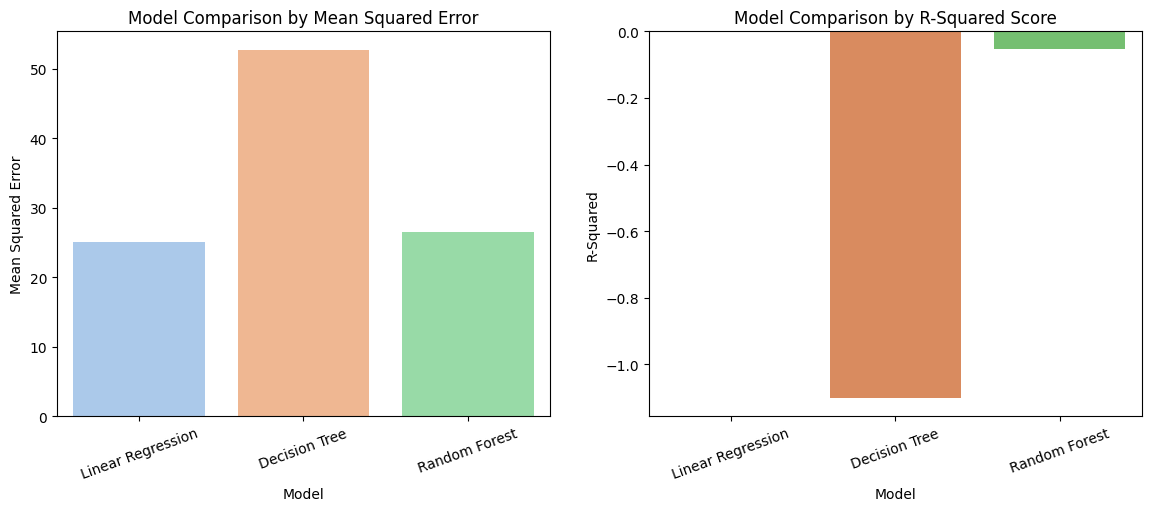

In [16]:

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# MSE Bar Chart
sns.barplot(x='Model', y='Mean Squared Error', data=results_df, ax=ax[0], palette='pastel')
ax[0].set_title('Model Comparison by Mean Squared Error')
ax[0].tick_params(axis='x', rotation=20)

# R² Bar Chart
sns.barplot(x='Model', y='R-Squared', data=results_df, ax=ax[1], palette='muted')
ax[1].set_title('Model Comparison by R-Squared Score')
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout
plt.savefig("MSE and R² Comparison Bar Charts.png", dpi=300, bbox_inches='tight')  # high quality
plt.show()
